In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

In [2]:
secrets_file = open("secrets.txt","r")

In [3]:
string = secrets_file.read()

In [4]:
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        secrets_dict[line.split(':')[0]]=line.split(':')[1]

In [5]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],
                                                           client_secret=secrets_dict['csecret']))

In [6]:
from random import randint
from time import sleep

def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,3))
    return tracks

In [7]:
def flatten(data, col_list):
    for column in col_list:
        flattened = pd.DataFrame(dict(data[column])).transpose()
        columns = [str(col) for col in flattened.columns]
        flattened.columns = [column + '_' + colname for colname in columns]
        data = pd.concat([data, flattened], axis=1)
        data = data.drop(column, axis=1)
    return data

# Soca & Dancehall Playlist 2

In [8]:
%%time
soca_playlist2 = get_playlist_tracks("4AZjyrUCG6uAxS1VIxUMGr")
len(soca_playlist2)

CPU times: total: 62.5 ms
Wall time: 11.8 s


463

In [ ]:
#for a in range(len(soca_playlist2)):
#    artist_1 = results["tracks"]["items"][0]["artists"][0]["name"]
#    artist_2 = ''
#    
#    try:
#        artist_2 = (results["tracks"]["items"][0]["artists"][1]["name"])
#        artist_2= " & "+artist_2
        
#        except:
#            pass
#            artist_3 = ''
#            try:
#                artist_3 = results["tracks"]["items"][0]["artists"][2]["name"]
#                artist_3= " & "+artist_3
#            except:
#                pass
#           artists = (artist_1+artist_2+artist_3)


In [35]:
soca_artist = []
soca_feature1 = []
soca_feature2 = []

for a in range(len(soca_playlist2)):
    insert = soca_playlist2[a]['track']['artists'][0]['name']
    soca_artist.append(insert)
    if len(soca_playlist2[a]['track']['artists']) > 1:
        soca_feature1.append(soca_playlist2[a]['track']['artists'][1]['name'])
    if len(soca_playlist2[a]['track']['artists']) > 2:
        soca_feature2.append(soca_playlist2[a]['track']['artists'][2]['name'])   
        

In [36]:
soca_track = []

for a in range(len(soca_playlist2)):
    adding = soca_playlist2[a]['track']['name']
    soca_track.append(adding)

In [37]:
soca_uri = []

for a in range(len(soca_playlist2)):
    adding = soca_playlist2[a]['track']['uri']
    soca_uri.append(adding)

In [38]:
soca_squish_uri = []

for i in range(len(soca_uri)):
    soca_squish_uri.append(sp.audio_features(soca_uri[i]))

In [39]:
soca_master = pd.DataFrame(soca_squish_uri)

In [40]:
soca_master.rename(columns = {0:'audio_features'}, inplace = True)

soca_master = soca_master.reset_index(drop=True)

In [ ]:
soca_master

In [41]:
soca_master = pd.DataFrame(dict(soca_master['audio_features'])).transpose()

In [ ]:
soca_master

In [42]:
soca_master.drop(['type' , 'id' , 'uri' , 'track_href' , 'analysis_url'], inplace=True, axis=1)

In [43]:
soca_artist = pd.DataFrame(soca_artist)
soca_artist.rename(columns = {0:'artist'}, inplace = True)
soca_feature1 = pd.DataFrame(soca_feature1)
soca_feature1.rename(columns = {0:'feature1'}, inplace = True)                                  
soca_feature2 = pd.DataFrame(soca_feature2)
soca_feature2.rename(columns = {0:'feature2'}, inplace = True)                                   
soca_track = pd.DataFrame(soca_track)
soca_track.rename(columns = {0:'track'}, inplace = True) 

In [44]:
master1 = pd.concat([soca_artist, soca_feature1, soca_feature2, soca_track, soca_master ], axis=1, join='outer')
master1

,artist,feature1,feature2,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,IQ,DJ CHEEM,Patrice Roberts,Soca Start,0.848,0.825,11,-4.287,1,0.109,0.0674,0.000001,0.0905,0.669,129.97,141296,4
1,Travis World,Dan Evens,Travis World,Mind My Business,0.806,0.886,6,-5.017,1,0.0526,0.00522,0.000014,0.104,0.735,125.043,119040,4
2,Motto,Kes,Bunji Garlin,Chicken and Rice,0.636,0.903,7,-4.863,1,0.137,0.0141,0,0.555,0.306,110.036,121704,4
3,Erphaan Alves,Nessa Preppy,Ashleia,Pick A Side,0.682,0.96,2,-3.474,1,0.173,0.192,0,0.0938,0.835,156.995,176561,4
4,Patrice Roberts,Machel Montano,Spice,Splash,0.89,0.846,5,-3.846,0,0.0362,0.0853,0.000002,0.34,0.64,109.972,154909,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,Motto,NaN,NaN,Fatty Boom Boom (Boom It!),0.928,0.751,10,-4.99,1,0.159,0.181,0,0.472,0.114,115.887,123720,4
459,BlackBoy,NaN,NaN,Fey (Do It),0.852,0.848,7,-5.633,1,0.0865,0.0296,0.000014,0.604,0.361,110.016,114913,4
460,Teejay,NaN,NaN,Bitcoin,0.802,0.541,10,-9.086,0,0.208,0.485,0.00821,0.18,0.301,133.208,196800,5
461,Ton3,NaN,NaN,Show Me,0.441,0.667,1,-7.956,1,0.0782,0.00416,0,0.0822,0.305,192.085,215767,4


In [46]:
master1.drop(['feature1' , 'feature2'], inplace=True, axis=1)

In [48]:
master1.isnull().sum()/len(master1)

artist              0.0
track               0.0
danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
duration_ms         0.0
time_signature      0.0
dtype: float64

# Massive Playlist

In [49]:
%%time
massive_playlist = get_playlist_tracks("5S8SJdl1BDc0ugpkEvFsIL")
len(massive_playlist)

CPU times: total: 1.98 s
Wall time: 4min 1s


10000

In [50]:
massive_artist = []
massive_feature1 = []
massive_feature2 = []

for a in range(len(massive_playlist)):
    insert = massive_playlist[a]['track']['artists'][0]['name']
    massive_artist.append(insert)
    if len(massive_playlist[a]['track']['artists']) > 1:
        massive_feature1.append(massive_playlist[a]['track']['artists'][1]['name'])
    if len(massive_playlist[a]['track']['artists']) > 2:
        massive_feature2.append(massive_playlist[a]['track']['artists'][2]['name']) 

In [51]:
massive_track = []

for a in range(len(massive_playlist)):
    adding = massive_playlist[a]['track']['name']
    massive_track.append(adding)

In [52]:
massive_uri = []

for a in range(len(massive_playlist)):
    adding = massive_playlist[a]['track']['uri']
    massive_uri.append(adding)

In [53]:
massive_squish_uri = []

for i in range(len(massive_uri)):
    massive_squish_uri.append(sp.audio_features(massive_uri[i]))

Expected id of type track but found type In+the+Shadow+of+the+Valley spotify:local:::In+the+Shadow+of+the+Valley:187
Expected id of type track but found type April+Sweatpants spotify:local:::April+Sweatpants:166
Expected id of type track but found type Gee+%28Korean+Ver.+MP3+only%29 spotify:local:SNSD::Gee+%28Korean+Ver.+MP3+only%29:205
Expected id of type track but found type Hero spotify:local:::Hero:194
Expected id of type track but found type Beneath+the+Mask+%5BWith+Lyrics%5D+-+Persona+5 spotify:local:::Beneath+the+Mask+%5BWith+Lyrics%5D+-+Persona+5:285
Expected id of type track but found type Last+Surprise+%5BWith+Lyrics%5D+-+Persona+5 spotify:local:::Last+Surprise+%5BWith+Lyrics%5D+-+Persona+5:236
Expected id of type track but found type Vampire+Weekend++Ottoman spotify:local:::Vampire+Weekend++Ottoman:244
Expected id of type track but found type Vampire+Weekend+-+Ottoman spotify:local:::Vampire+Weekend+-+Ottoman:234
Expected id of type track but found type Father+Christmas spot

In [54]:
massive_master = pd.DataFrame(massive_squish_uri)

In [55]:
massive_master.rename(columns = {0:'audio_features'}, inplace = True)

massive_master = massive_master.reset_index(drop=True)

In [56]:
massive_master

,audio_features
0,"{'danceability': 0.615, 'energy': 0.779, 'key'..."
1,"{'danceability': 0.687, 'energy': 0.845, 'key'..."
2,"{'danceability': 0.818, 'energy': 0.803, 'key'..."
3,"{'danceability': 0.624, 'energy': 0.876, 'key'..."
4,"{'danceability': 0.614, 'energy': 0.379, 'key'..."
...,...
9995,"{'danceability': 0.41, 'energy': 0.761, 'key':..."
9996,"{'danceability': 0.406, 'energy': 0.306, 'key'..."
9997,"{'danceability': 0.362, 'energy': 0.507, 'key'..."
9998,"{'danceability': 0.331, 'energy': 0.733, 'key'..."


In [57]:
massive_master = pd.DataFrame(dict(massive_master['audio_features'])).transpose()

In [58]:
massive_master

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.615,0.779,2,-6.454,1,0.135,0.0665,0,0.155,0.453,160.0,audio_features,7zgqtptZvhf8GEmdsM2vp2,spotify:track:7zgqtptZvhf8GEmdsM2vp2,https://api.spotify.com/v1/tracks/7zgqtptZvhf8...,https://api.spotify.com/v1/audio-analysis/7zgq...,208198,4
1,0.687,0.845,7,-4.37,1,0.0576,0.1,0,0.0452,0.809,87.972,audio_features,4Vxu50qVrQcycjRyJQaZLC,spotify:track:4Vxu50qVrQcycjRyJQaZLC,https://api.spotify.com/v1/tracks/4Vxu50qVrQcy...,https://api.spotify.com/v1/audio-analysis/4Vxu...,190227,4
2,0.818,0.803,1,-4.282,1,0.0797,0.034,0,0.153,0.632,106.97,audio_features,6b8Be6ljOzmkOmFslEb23P,spotify:track:6b8Be6ljOzmkOmFslEb23P,https://api.spotify.com/v1/tracks/6b8Be6ljOzmk...,https://api.spotify.com/v1/audio-analysis/6b8B...,225983,4
3,0.624,0.876,9,-3.374,1,0.1,0.0735,0,0.327,0.781,99.943,audio_features,0afhq8XCExXpqazXczTSve,spotify:track:0afhq8XCExXpqazXczTSve,https://api.spotify.com/v1/tracks/0afhq8XCExXp...,https://api.spotify.com/v1/audio-analysis/0afh...,170827,4
4,0.614,0.379,4,-10.48,1,0.0476,0.607,0.000464,0.0986,0.201,107.989,audio_features,1HNkqx9Ahdgi1Ixy2xkKkL,spotify:track:1HNkqx9Ahdgi1Ixy2xkKkL,https://api.spotify.com/v1/tracks/1HNkqx9Ahdgi...,https://api.spotify.com/v1/audio-analysis/1HNk...,258987,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.41,0.761,9,-8.507,0,0.0465,0.0198,0.0847,0.247,0.193,138.712,audio_features,4UFlPCB4THnQ9TlPHqIQow,spotify:track:4UFlPCB4THnQ9TlPHqIQow,https://api.spotify.com/v1/tracks/4UFlPCB4THnQ...,https://api.spotify.com/v1/audio-analysis/4UFl...,666572,4
9996,0.406,0.306,3,-10.482,1,0.0372,0.313,0.0079,0.0727,0.073,135.272,audio_features,5pSSEkT0963muzzIjsVkrs,spotify:track:5pSSEkT0963muzzIjsVkrs,https://api.spotify.com/v1/tracks/5pSSEkT0963m...,https://api.spotify.com/v1/audio-analysis/5pSS...,652560,4
9997,0.362,0.507,1,-11.229,1,0.0394,0.0174,0.216,0.113,0.456,146.641,audio_features,7gC6Rbllqf1yXNC02e5jz2,spotify:track:7gC6Rbllqf1yXNC02e5jz2,https://api.spotify.com/v1/tracks/7gC6Rbllqf1y...,https://api.spotify.com/v1/audio-analysis/7gC6...,634440,3
9998,0.331,0.733,2,-8.671,1,0.0468,0.0887,0.00174,0.947,0.38,128.512,audio_features,6Ff77WXC58MkhLE5A1qgY1,spotify:track:6Ff77WXC58MkhLE5A1qgY1,https://api.spotify.com/v1/tracks/6Ff77WXC58Mk...,https://api.spotify.com/v1/audio-analysis/6Ff7...,620747,4


In [61]:
massive_master.drop(['type' , 'id' , 'uri' , 'track_href' , 'analysis_url'], inplace=True, axis=1)

KeyError: "['type', 'id', 'uri', 'track_href', 'analysis_url'] not found in axis"

In [62]:
massive_master

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.615,0.779,2,-6.454,1,0.135,0.0665,0,0.155,0.453,160.0,208198,4
1,0.687,0.845,7,-4.37,1,0.0576,0.1,0,0.0452,0.809,87.972,190227,4
2,0.818,0.803,1,-4.282,1,0.0797,0.034,0,0.153,0.632,106.97,225983,4
3,0.624,0.876,9,-3.374,1,0.1,0.0735,0,0.327,0.781,99.943,170827,4
4,0.614,0.379,4,-10.48,1,0.0476,0.607,0.000464,0.0986,0.201,107.989,258987,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.41,0.761,9,-8.507,0,0.0465,0.0198,0.0847,0.247,0.193,138.712,666572,4
9996,0.406,0.306,3,-10.482,1,0.0372,0.313,0.0079,0.0727,0.073,135.272,652560,4
9997,0.362,0.507,1,-11.229,1,0.0394,0.0174,0.216,0.113,0.456,146.641,634440,3
9998,0.331,0.733,2,-8.671,1,0.0468,0.0887,0.00174,0.947,0.38,128.512,620747,4


In [63]:
massive_artist = pd.DataFrame(massive_artist)
massive_artist.rename(columns = {0:'artist'}, inplace = True)
massive_feature1 = pd.DataFrame(massive_feature1)
massive_feature1.rename(columns = {0:'feature1'}, inplace = True)                                  
massive_feature2 = pd.DataFrame(massive_feature2)
massive_feature2.rename(columns = {0:'feature2'}, inplace = True)                                   
massive_track = pd.DataFrame(massive_track)
massive_track.rename(columns = {0:'track'}, inplace = True) 

In [64]:
master2 = pd.concat([massive_artist, massive_track, massive_master ], axis=1, join='outer')
master2

,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Taylor Swift,...Ready For It?,0.615,0.779,2,-6.454,1,0.135,0.0665,0,0.155,0.453,160.0,208198,4
1,Thomas Rhett,Life Changes,0.687,0.845,7,-4.37,1,0.0576,0.1,0,0.0452,0.809,87.972,190227,4
2,Bruno Mars,24K Magic,0.818,0.803,1,-4.282,1,0.0797,0.034,0,0.153,0.632,106.97,225983,4
3,Ed Sheeran,Galway Girl,0.624,0.876,9,-3.374,1,0.1,0.0735,0,0.327,0.781,99.943,170827,4
4,Ed Sheeran,Photograph,0.614,0.379,4,-10.48,1,0.0476,0.607,0.000464,0.0986,0.201,107.989,258987,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Elton John,Funeral For A Friend / Love Lies Bleeding,0.41,0.761,9,-8.507,0,0.0465,0.0198,0.0847,0.247,0.193,138.712,666572,4
9996,Supertramp,Fool's Overture,0.406,0.306,3,-10.482,1,0.0372,0.313,0.0079,0.0727,0.073,135.272,652560,4
9997,Yes,Heart of the Sunrise - 2003 Remaster,0.362,0.507,1,-11.229,1,0.0394,0.0174,0.216,0.113,0.456,146.641,634440,3
9998,Paul McCartney,Venus And Mars / Rock Show / Jet - Live / Rema...,0.331,0.733,2,-8.671,1,0.0468,0.0887,0.00174,0.947,0.38,128.512,620747,4


In [65]:
master2.isnull().sum()/len(master2)

artist              0.0000
track               0.0000
danceability        0.0039
energy              0.0039
key                 0.0039
loudness            0.0039
mode                0.0039
speechiness         0.0039
acousticness        0.0039
instrumentalness    0.0039
liveness            0.0039
valence             0.0039
tempo               0.0039
duration_ms         0.0039
time_signature      0.0039
dtype: float64

In [133]:
master2.dropna()

,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Taylor Swift,...Ready For It?,0.615,0.779,2,-6.454,1,0.135,0.0665,0,0.155,0.453,160.0,208198,4
1,Thomas Rhett,Life Changes,0.687,0.845,7,-4.37,1,0.0576,0.1,0,0.0452,0.809,87.972,190227,4
2,Bruno Mars,24K Magic,0.818,0.803,1,-4.282,1,0.0797,0.034,0,0.153,0.632,106.97,225983,4
3,Ed Sheeran,Galway Girl,0.624,0.876,9,-3.374,1,0.1,0.0735,0,0.327,0.781,99.943,170827,4
4,Ed Sheeran,Photograph,0.614,0.379,4,-10.48,1,0.0476,0.607,0.000464,0.0986,0.201,107.989,258987,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Elton John,Funeral For A Friend / Love Lies Bleeding,0.41,0.761,9,-8.507,0,0.0465,0.0198,0.0847,0.247,0.193,138.712,666572,4
9996,Supertramp,Fool's Overture,0.406,0.306,3,-10.482,1,0.0372,0.313,0.0079,0.0727,0.073,135.272,652560,4
9997,Yes,Heart of the Sunrise - 2003 Remaster,0.362,0.507,1,-11.229,1,0.0394,0.0174,0.216,0.113,0.456,146.641,634440,3
9998,Paul McCartney,Venus And Mars / Rock Show / Jet - Live / Rema...,0.331,0.733,2,-8.671,1,0.0468,0.0887,0.00174,0.947,0.38,128.512,620747,4


# Decades Mix

In [68]:
%%time
decades_mix = get_playlist_tracks("3Pfh9gIWGYYSNEpJbAR6mZ")
len(decades_mix)

CPU times: total: 484 ms
Wall time: 11.6 s


502

In [69]:
decades_artist = []
decades_feature1 = []
decades_feature2 = []

for a in range(len(decades_mix)):
    insert = decades_mix[a]['track']['artists'][0]['name']
    decades_artist.append(insert)
    if len(decades_mix[a]['track']['artists']) > 1:
        decades_feature1.append(decades_mix[a]['track']['artists'][1]['name'])
    if len(decades_mix[a]['track']['artists']) > 2:
        decades_feature2.append(decades_mix[a]['track']['artists'][2]['name']) 

In [70]:
decades_track = []

for a in range(len(decades_mix)):
    adding = decades_mix[a]['track']['name']
    decades_track.append(adding)

In [71]:
decades_uri = []

for a in range(len(decades_mix)):
    adding = decades_mix[a]['track']['uri']
    decades_uri.append(adding)

In [72]:
decades_squish_uri = []

for i in range(len(decades_uri)):
    decades_squish_uri.append(sp.audio_features(decades_uri[i]))

In [73]:
decades_master = pd.DataFrame(decades_squish_uri)

In [74]:
decades_master.rename(columns = {0:'audio_features'}, inplace = True)

decades_master = decades_master.reset_index(drop=True)

In [75]:
decades_master = pd.DataFrame(dict(decades_master['audio_features'])).transpose()

In [76]:
decades_master.drop(['type' , 'id' , 'uri' , 'track_href' , 'analysis_url'], inplace=True, axis=1)

In [77]:
decades_artist = pd.DataFrame(decades_artist)
decades_artist.rename(columns = {0:'artist'}, inplace = True)
decades_feature1 = pd.DataFrame(decades_feature1)
decades_feature1.rename(columns = {0:'feature1'}, inplace = True)                                  
decades_feature2 = pd.DataFrame(decades_feature2)
decades_feature2.rename(columns = {0:'feature2'}, inplace = True)                                   
decades_track = pd.DataFrame(decades_track)
decades_track.rename(columns = {0:'track'}, inplace = True) 

In [78]:
master3 = pd.concat([decades_artist, decades_track, decades_master ], axis=1, join='outer')
master3

,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Queen,I Want To Break Free - Remastered 2011,0.875,0.407,4,-10.505,1,0.0376,0.0769,0.000785,0.116,0.777,109.088,198773,4
1,Carly Rae Jepsen,Call Me Maybe,0.783,0.58,7,-6.548,1,0.0408,0.0114,0.000002,0.108,0.66,120.021,193400,4
2,Duck Sauce,Barbra Streisand - UK Radio Edit,0.769,0.921,1,-1.941,1,0.091,0.00175,0.109,0.22,0.576,127.955,140620,4
3,LMFAO,Sexy And I Know It,0.707,0.861,7,-4.225,1,0.316,0.1,0,0.191,0.795,130.021,199480,4
4,Lady Gaga,The Edge Of Glory,0.583,0.768,9,-6.477,1,0.041,0.000323,0.0162,0.109,0.357,127.952,320547,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,The Klezmatics,Man in a Hat,0.513,0.587,2,-12.297,1,0.174,0.438,0.000058,0.212,0.755,175.751,183160,4
498,Crowded House,Weather With You,0.643,0.614,2,-12.878,1,0.0279,0.25,0.000007,0.214,0.891,93.982,224467,4
499,R.E.M.,Shiny Happy People,0.452,0.909,9,-3.977,1,0.0366,0.0313,0.0603,0.23,0.805,124.623,225787,4
500,Eddie Floyd,Knock on Wood,0.864,0.346,4,-12.918,1,0.0365,0.277,0.00521,0.0514,0.964,105.164,189840,4


In [79]:
master3.isnull().sum()/len(master3)

artist              0.0
track               0.0
danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
duration_ms         0.0
time_signature      0.0
dtype: float64

# Dancehall

In [80]:
%%time
dancehall = get_playlist_tracks("6eWJiWAVAaSIkFkeKHjTHv")
len(dancehall)

CPU times: total: 15.6 ms
Wall time: 4.26 s


221

In [81]:
dancehall_artist = []
dancehall_feature1 = []
dancehall_feature2 = []

for a in range(len(dancehall)):
    insert = dancehall[a]['track']['artists'][0]['name']
    dancehall_artist.append(insert)
    if len(dancehall[a]['track']['artists']) > 1:
        dancehall_feature1.append(dancehall[a]['track']['artists'][1]['name'])
    if len(dancehall[a]['track']['artists']) > 2:
        dancehall_feature2.append(dancehall[a]['track']['artists'][2]['name']) 

In [82]:
dancehall_track = []

for a in range(len(dancehall)):
    adding = dancehall[a]['track']['name']
    dancehall_track.append(adding)

In [83]:
dancehall_uri = []

for a in range(len(dancehall)):
    adding = dancehall[a]['track']['uri']
    dancehall_uri.append(adding)

In [84]:
dancehall_squish_uri = []

for i in range(len(dancehall_uri)):
    dancehall_squish_uri.append(sp.audio_features(dancehall_uri[i]))

In [85]:
dancehall_master = pd.DataFrame(dancehall_squish_uri)

In [86]:
dancehall_master.rename(columns = {0:'audio_features'}, inplace = True)

dancehall_master = dancehall_master.reset_index(drop=True)

In [87]:
dancehall_master = pd.DataFrame(dict(dancehall_master['audio_features'])).transpose()

In [88]:
dancehall_master.drop(['type' , 'id' , 'uri' , 'track_href' , 'analysis_url'], inplace=True, axis=1)

In [89]:
dancehall_artist = pd.DataFrame(dancehall_artist)
dancehall_artist.rename(columns = {0:'artist'}, inplace = True)
dancehall_feature1 = pd.DataFrame(dancehall_feature1)
dancehall_feature1.rename(columns = {0:'feature1'}, inplace = True)                                  
dancehall_feature2 = pd.DataFrame(dancehall_feature2)
dancehall_feature2.rename(columns = {0:'feature2'}, inplace = True)                                   
dancehall_track = pd.DataFrame(dancehall_track)
dancehall_track.rename(columns = {0:'track'}, inplace = True) 

In [90]:
master4 = pd.concat([dancehall_artist, dancehall_track, dancehall_master ], axis=1, join='outer')
master4

,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Konshens,Bruk Off Yuh Back,0.816,0.875,7,-2.499,1,0.184,0.187,0,0.0346,0.952,100.967,173465,4
1,Charly Black,Gyal You A Party Animal,0.599,0.838,0,-5.16,1,0.0996,0.0272,0,0.33,0.847,128.854,214867,4
2,Mr. Vegas,Bruk It Down,0.919,0.781,2,-4.704,1,0.217,0.219,0,0.221,0.559,118.982,172019,4
3,Shenseea,Shen Yeng Anthem,0.67,0.823,1,-2.24,0,0.295,0.14,0,0.311,0.655,105.739,141226,4
4,Konshens,Pull up to Mi Bumper,0.599,0.683,7,-3.812,1,0.464,0.448,0,0.0463,0.75,211.958,150280,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,Mavado,On My Mind,0.712,0.71,9,-5.533,0,0.197,0.334,0,0.111,0.634,98.229,177600,4
217,Mavado,When U Feel Lonely,0.552,0.695,0,-5.954,0,0.124,0.108,0,0.34,0.654,120.718,192280,5
218,IQ,Bun Fi Bun,0.482,0.632,11,-5.876,0,0.259,0.115,0.000052,0.208,0.519,83.329,197143,4
219,DJ Khaled,"THESE STREETS KNOW MY NAME (feat. Skillibeng, ...",0.56,0.728,0,-5.998,0,0.234,0.00623,0,0.461,0.0807,117.465,299933,5


In [91]:
master4.isnull().sum()/len(master4)

artist              0.0
track               0.0
danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
duration_ms         0.0
time_signature      0.0
dtype: float64

# 70s R&B

In [92]:
%%time
seventies_rb = get_playlist_tracks("7e9kCHPGrQL6RaqJak1YFk")
len(seventies_rb)

CPU times: total: 46.9 ms
Wall time: 6.27 s


319

In [93]:
seventies_artist = []
seventies_feature1 = []
seventies_feature2 = []

for a in range(len(seventies_rb)):
    insert = seventies_rb[a]['track']['artists'][0]['name']
    seventies_artist.append(insert)
    if len(seventies_rb[a]['track']['artists']) > 1:
        seventies_feature1.append(seventies_rb[a]['track']['artists'][1]['name'])
    if len(seventies_rb[a]['track']['artists']) > 2:
        seventies_feature2.append(seventies_rb[a]['track']['artists'][2]['name']) 

In [94]:
seventies_track = []

for a in range(len(seventies_rb)):
    adding = seventies_rb[a]['track']['name']
    seventies_track.append(adding)

In [95]:
seventies_uri = []

for a in range(len(seventies_rb)):
    adding = seventies_rb[a]['track']['uri']
    seventies_uri.append(adding)

In [96]:
seventies_squish_uri = []

for i in range(len(seventies_uri)):
    seventies_squish_uri.append(sp.audio_features(seventies_uri[i]))

In [97]:
seventies_master = pd.DataFrame(seventies_squish_uri)

In [98]:
seventies_master.rename(columns = {0:'audio_features'}, inplace = True)

seventies_master = seventies_master.reset_index(drop=True)

In [99]:
seventies_master = pd.DataFrame(dict(seventies_master['audio_features'])).transpose()

In [100]:
seventies_master.drop(['type' , 'id' , 'uri' , 'track_href' , 'analysis_url'], inplace=True, axis=1)

In [101]:
seventies_artist = pd.DataFrame(seventies_artist)
seventies_artist.rename(columns = {0:'artist'}, inplace = True)
seventies_feature1 = pd.DataFrame(seventies_feature1)
seventies_feature1.rename(columns = {0:'feature1'}, inplace = True)                                  
seventies_feature2 = pd.DataFrame(seventies_feature2)
seventies_feature2.rename(columns = {0:'feature2'}, inplace = True)                                   
seventies_track = pd.DataFrame(seventies_track)
seventies_track.rename(columns = {0:'track'}, inplace = True) 

In [102]:
master5 = pd.concat([seventies_artist, seventies_track, seventies_master], axis=1, join='outer')
master5

,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,The Spinners,I'll Be Around - 2003 Remaster,0.833,0.806,4,-7.439,1,0.0463,0.271,0.000001,0.159,0.841,112.23,191787,4
1,Lenny Williams,'Cause I Love You,0.51,0.311,10,-12.441,0,0.056,0.573,0,0.131,0.377,132.25,430000,3
2,Marvin Gaye,Trouble Man - Extended Version,0.472,0.395,9,-9.243,0,0.0346,0.604,0.000009,0.0941,0.357,137.289,249667,5
3,"Earth, Wind & Fire",That's the Way of the World,0.586,0.552,1,-11.153,1,0.0488,0.593,0.00101,0.31,0.732,82.0,345507,4
4,Bobby Caldwell,What You Won't Do For Love,0.644,0.395,6,-16.828,1,0.0627,0.452,0.000892,0.262,0.813,84.072,286493,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,Alan Tew,The Detectives (Interlude),0.525,0.171,5,-23.201,1,0.0347,0.554,0.948,0.137,0.248,121.763,108702,4
315,The Earth Disciples,Spirit Of The Bells,0.515,0.31,2,-20.169,1,0.0385,0.857,0.904,0.115,0.682,143.777,205067,4
316,The J.B.'s,Pass The Peas,0.827,0.466,2,-9.959,1,0.105,0.598,0.181,0.0931,0.77,98.558,211800,4
317,Windy City,Win or Lose,0.459,0.655,0,-11.178,1,0.197,0.159,0.000242,0.127,0.577,145.053,182400,4


In [103]:
master5.isnull().sum()/len(master5)

artist              0.0
track               0.0
danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
duration_ms         0.0
time_signature      0.0
dtype: float64

# 80s R&B

In [104]:
%%time
eighties_rb = get_playlist_tracks("4n20EfwxAvxAXiV5GEDjzh")
len(eighties_rb)

CPU times: total: 46.9 ms
Wall time: 7.34 s


336

In [105]:
eighties_artist = []
eighties_feature1 = []
eighties_feature2 = []

for a in range(len(eighties_rb)):
    insert = eighties_rb[a]['track']['artists'][0]['name']
    eighties_artist.append(insert)
    if len(eighties_rb[a]['track']['artists']) > 1:
        eighties_feature1.append(eighties_rb[a]['track']['artists'][1]['name'])
    if len(eighties_rb[a]['track']['artists']) > 2:
        eighties_feature2.append(eighties_rb[a]['track']['artists'][2]['name']) 

In [106]:
eighties_track = []

for a in range(len(eighties_rb)):
    adding = eighties_rb[a]['track']['name']
    eighties_track.append(adding)

In [107]:
eighties_uri = []

for a in range(len(eighties_rb)):
    adding = eighties_rb[a]['track']['uri']
    eighties_uri.append(adding)

In [108]:
eighties_squish_uri = []

for i in range(len(eighties_uri)):
    eighties_squish_uri.append(sp.audio_features(eighties_uri[i]))

In [109]:
# eighties_squish_uri

In [110]:
eighties_master = pd.DataFrame(eighties_squish_uri)

In [111]:
eighties_master.rename(columns = {0:'audio_features'}, inplace = True)

eighties_master = eighties_master.reset_index(drop=True)


In [112]:
eighties_master = pd.DataFrame(dict(eighties_master['audio_features'])).transpose()

In [113]:
eighties_master.drop(['type' , 'id' , 'uri' , 'track_href' , 'analysis_url'], inplace=True, axis=1)

In [114]:
eighties_artist = pd.DataFrame(eighties_artist)
eighties_artist.rename(columns = {0:'artist'}, inplace = True)
eighties_feature1 = pd.DataFrame(eighties_feature1)
eighties_feature1.rename(columns = {0:'feature1'}, inplace = True)                                  
eighties_feature2 = pd.DataFrame(eighties_feature2)
eighties_feature2.rename(columns = {0:'feature2'}, inplace = True)                                   
eighties_track = pd.DataFrame(eighties_track)
eighties_track.rename(columns = {0:'track'}, inplace = True)    

In [115]:
master6 = pd.concat([eighties_artist, eighties_track, eighties_master], axis=1, join='outer')
master6

,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Cherrelle,"Saturday Love - 12"" Extended Version",0.865,0.394,11,-12.235,1,0.0528,0.0832,0.00231,0.302,0.643,115.936,521693,4
1,Cherrelle,I Didn't Mean To Turn You On,0.77,0.879,9,-7.137,1,0.0622,0.0554,0.0331,0.556,0.712,120.249,423427,4
2,The S.O.S Band,Take Your Time (Do It Right),0.868,0.717,4,-8.533,0,0.0613,0.0265,0.011,0.0835,0.903,118.951,457880,4
3,The S.O.S Band,Tell Me If You Still Care,0.578,0.675,4,-14.388,0,0.0391,0.071,0.00638,0.0988,0.944,81.135,416733,4
4,The S.O.S Band,Just Be Good To Me,0.608,0.909,2,-11.065,1,0.0315,0.021,0.125,0.0795,0.856,100.872,549000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,Miki Howard,Until You Come Back to Me (That's What I Am Go...,0.601,0.893,7,-7.784,1,0.0381,0.00839,0.000041,0.244,0.815,95.837,247733,4
332,The Jones Girls,Knockin',0.802,0.662,4,-8.392,0,0.0598,0.59,0.000008,0.178,0.695,106.116,304027,4
333,Meli'sa Morgan,If You Can Do It: I Can Too!! - Remastered 2013,0.86,0.506,2,-8.415,1,0.0546,0.0781,0.000111,0.126,0.555,110.231,286213,4
334,Wham!,Young Guns (Go for It!),0.895,0.753,9,-9.222,0,0.0825,0.201,0.0047,0.153,0.589,117.932,236200,4


In [116]:
master6.isnull().sum()/len(master6)

artist              0.0
track               0.0
danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
duration_ms         0.0
time_signature      0.0
dtype: float64

# 90s R&B

In [117]:
%%time
nineties_rb = get_playlist_tracks("1kMyrcNKPws587cSAOjyDP")
len(nineties_rb)

CPU times: total: 0 ns
Wall time: 1.68 s


137

In [118]:
nineties_rb[0]['track']['uri']

'spotify:track:0YwUJOHKYxlm5gVfIkl8Ym'

In [119]:
nineties_artist = []
nineties_feature1 = []
nineties_feature2 = []

for a in range(len(nineties_rb)):
    insert = nineties_rb[a]['track']['artists'][0]['name']
    nineties_artist.append(insert)
    if len(nineties_rb[a]['track']['artists']) > 1:
        nineties_feature1.append(nineties_rb[a]['track']['artists'][1]['name'])
    if len(nineties_rb[a]['track']['artists']) > 2:
        nineties_feature2.append(nineties_rb[a]['track']['artists'][2]['name'])   
        
        


In [120]:
nineties_track = []

for a in range(len(nineties_rb)):
    adding = nineties_rb[a]['track']['name']
    nineties_track.append(adding)


In [121]:
nineties_uri = []

for a in range(len(nineties_rb)):
    adding = nineties_rb[a]['track']['uri']
    nineties_uri.append(adding)

In [122]:
nineties_uri[0]

'spotify:track:0YwUJOHKYxlm5gVfIkl8Ym'

In [123]:
sp.audio_features(nineties_uri[0])

[{'danceability': 0.696,
  'energy': 0.49,
  'key': 6,
  'loudness': -6.631,
  'mode': 0,
  'speechiness': 0.0347,
  'acousticness': 0.155,
  'instrumentalness': 0.000351,
  'liveness': 0.0563,
  'valence': 0.557,
  'tempo': 179.825,
  'type': 'audio_features',
  'id': '0YwUJOHKYxlm5gVfIkl8Ym',
  'uri': 'spotify:track:0YwUJOHKYxlm5gVfIkl8Ym',
  'track_href': 'https://api.spotify.com/v1/tracks/0YwUJOHKYxlm5gVfIkl8Ym',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0YwUJOHKYxlm5gVfIkl8Ym',
  'duration_ms': 288840,
  'time_signature': 4}]

In [124]:
nineties_squish_uri = []

for z in range(len(nineties_uri)):
    nineties_squish_uri.append(sp.audio_features(nineties_uri[z]))



In [125]:
nineties_master = pd.DataFrame(nineties_squish_uri)

In [126]:
nineties_master.rename(columns = {0:'audio_features'}, inplace = True)

nineties_master = nineties_master.reset_index(drop=True)

nineties_master

,audio_features
0,"{'danceability': 0.696, 'energy': 0.49, 'key':..."
1,"{'danceability': 0.787, 'energy': 0.585, 'key'..."
2,"{'danceability': 0.778, 'energy': 0.644, 'key'..."
3,"{'danceability': 0.767, 'energy': 0.731, 'key'..."
4,"{'danceability': 0.902, 'energy': 0.614, 'key'..."
...,...
132,"{'danceability': 0.724, 'energy': 0.485, 'key'..."
133,"{'danceability': 0.64, 'energy': 0.433, 'key':..."
134,"{'danceability': 0.549, 'energy': 0.446, 'key'..."
135,"{'danceability': 0.496, 'energy': 0.298, 'key'..."


In [127]:
nineties_master = pd.DataFrame(dict(nineties_master['audio_features'])).transpose()
#nineties_master

In [128]:
nineties_master.drop(['type' , 'id' , 'uri' , 'track_href' , 'analysis_url'], inplace=True, axis=1)
# nineties_master

In [129]:
nineties_artist = pd.DataFrame(nineties_artist)
nineties_artist.rename(columns = {0:'artist'}, inplace = True)
nineties_feature1 = pd.DataFrame(nineties_feature1)
nineties_feature1.rename(columns = {0:'feature1'}, inplace = True)                                  
nineties_feature2 = pd.DataFrame(nineties_feature2)
nineties_feature2.rename(columns = {0:'feature2'}, inplace = True)                                   
nineties_track = pd.DataFrame(nineties_track)
nineties_track.rename(columns = {0:'track'}, inplace = True)                                   

In [130]:
master7 = pd.concat([nineties_artist, nineties_track, nineties_master], axis=1, join='outer')
master7

,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Brandy,Best Friend,0.696,0.49,6,-6.631,0,0.0347,0.155,0.000351,0.0563,0.557,179.825,288840,4
1,Soul For Real,Candy Rain - Heavy D & TrakMasterz Mix,0.787,0.585,9,-7.529,1,0.0492,0.0118,0.00003,0.117,0.751,93.881,261627,4
2,112,Only You (feat. The Notorious B.I.G.) - Radio Mix,0.778,0.644,8,-7.6,1,0.0532,0.145,0,0.112,0.846,96.025,260427,4
3,702,Steelo,0.767,0.731,8,-8.109,0,0.114,0.103,0.00364,0.102,0.678,90.997,257960,4
4,Big Pun,Still Not a Player (feat. Joe),0.902,0.614,4,-6.529,0,0.289,0.184,0.000742,0.0867,0.862,94.069,236907,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Joe,I Wanna Know,0.724,0.485,6,-5.919,1,0.0376,0.256,0.000013,0.416,0.581,136.057,296800,4
133,The Tony Rich Project,Nobody Knows,0.64,0.433,5,-9.432,1,0.0375,0.509,0.000005,0.103,0.25,176.088,306933,4
134,H-Town,A Thin Line Between Love & Hate (feat. Shirley...,0.549,0.446,0,-7.807,1,0.258,0.536,0,0.0442,0.511,122.431,300000,4
135,En Vogue,Giving Him Something He Can Feel,0.496,0.298,9,-10.175,0,0.0405,0.306,0.000002,0.0875,0.705,203.824,235707,3


In [131]:
master7.isnull().sum()/len(master7)

artist              0.0
track               0.0
danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
duration_ms         0.0
time_signature      0.0
dtype: float64

In [132]:
master_playlist = pd.concat([master1, master2, master3, master4, master5, master6, master7])

In [136]:
master_playlist.isnull().sum()/len(master_playlist)

artist              0.000000
track               0.000000
danceability        0.003256
energy              0.003256
key                 0.003256
loudness            0.003256
mode                0.003256
speechiness         0.003256
acousticness        0.003256
instrumentalness    0.003256
liveness            0.003256
valence             0.003256
tempo               0.003256
duration_ms         0.003256
time_signature      0.003256
dtype: float64

In [138]:
master_playlist = master_playlist.dropna()

In [139]:
master_playlist

,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,IQ,Soca Start,0.848,0.825,11,-4.287,1,0.109,0.0674,0.000001,0.0905,0.669,129.97,141296,4
1,Travis World,Mind My Business,0.806,0.886,6,-5.017,1,0.0526,0.00522,0.000014,0.104,0.735,125.043,119040,4
2,Motto,Chicken and Rice,0.636,0.903,7,-4.863,1,0.137,0.0141,0,0.555,0.306,110.036,121704,4
3,Erphaan Alves,Pick A Side,0.682,0.96,2,-3.474,1,0.173,0.192,0,0.0938,0.835,156.995,176561,4
4,Patrice Roberts,Splash,0.89,0.846,5,-3.846,0,0.0362,0.0853,0.000002,0.34,0.64,109.972,154909,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Joe,I Wanna Know,0.724,0.485,6,-5.919,1,0.0376,0.256,0.000013,0.416,0.581,136.057,296800,4
133,The Tony Rich Project,Nobody Knows,0.64,0.433,5,-9.432,1,0.0375,0.509,0.000005,0.103,0.25,176.088,306933,4
134,H-Town,A Thin Line Between Love & Hate (feat. Shirley...,0.549,0.446,0,-7.807,1,0.258,0.536,0,0.0442,0.511,122.431,300000,4
135,En Vogue,Giving Him Something He Can Feel,0.496,0.298,9,-10.175,0,0.0405,0.306,0.000002,0.0875,0.705,203.824,235707,3


In [140]:
master_playlist.isnull().sum()/len(master_playlist)

artist              0.0
track               0.0
danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
duration_ms         0.0
time_signature      0.0
dtype: float64

In [147]:
master_playlist.to_csv('master_playlist.csv', index=False)

In [150]:
data = pd.read_csv('master_playlist.csv') 
data

,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,IQ,Soca Start,0.848,0.825,11,-4.287,1,0.1090,0.06740,0.000001,0.0905,0.669,129.970,141296,4
1,Travis World,Mind My Business,0.806,0.886,6,-5.017,1,0.0526,0.00522,0.000014,0.1040,0.735,125.043,119040,4
2,Motto,Chicken and Rice,0.636,0.903,7,-4.863,1,0.1370,0.01410,0.000000,0.5550,0.306,110.036,121704,4
3,Erphaan Alves,Pick A Side,0.682,0.960,2,-3.474,1,0.1730,0.19200,0.000000,0.0938,0.835,156.995,176561,4
4,Patrice Roberts,Splash,0.890,0.846,5,-3.846,0,0.0362,0.08530,0.000002,0.3400,0.640,109.972,154909,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,Joe,I Wanna Know,0.724,0.485,6,-5.919,1,0.0376,0.25600,0.000013,0.4160,0.581,136.057,296800,4
11935,The Tony Rich Project,Nobody Knows,0.640,0.433,5,-9.432,1,0.0375,0.50900,0.000005,0.1030,0.250,176.088,306933,4
11936,H-Town,A Thin Line Between Love & Hate (feat. Shirley...,0.549,0.446,0,-7.807,1,0.2580,0.53600,0.000000,0.0442,0.511,122.431,300000,4
11937,En Vogue,Giving Him Something He Can Feel,0.496,0.298,9,-10.175,0,0.0405,0.30600,0.000002,0.0875,0.705,203.824,235707,3


In [153]:
data.drop(['artist' , 'track'], inplace=True, axis=1)

In [154]:
from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(data)

# Now, all features will have the same weight.
pd.DataFrame(X_prep,columns=data.columns).head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1.549755,0.757179,1.607929,0.797214,0.742377,0.433977,-0.588664,-0.385605,-0.608992,0.640703,0.350262,-0.399571,0.165493
1,1.301462,1.035436,0.214313,0.626453,0.742377,-0.277860,-0.810272,-0.385552,-0.520271,0.900655,0.172731,-0.465318,0.165493
2,0.296469,1.112982,0.493036,0.662476,0.742377,0.787371,-0.778624,-0.385610,2.443655,-0.789036,-0.368008,-0.457448,0.165493
3,0.568408,1.372992,-0.900580,0.987390,0.742377,1.241736,-0.144593,-0.385610,-0.587304,1.294522,1.324038,-0.295395,0.165493
4,1.798047,0.852972,-0.064411,0.900372,-1.347024,-0.484849,-0.524869,-0.385603,1.030697,0.526481,-0.370314,-0.359357,0.165493


In [158]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=1234)
kmeans.fit(X_prep)

KMeans(n_clusters=10, random_state=1234)

In [159]:
clusters = kmeans.predict(X_prep)
pd.Series(clusters).value_counts().sort_index()

0    1875
1     463
2      98
3    1569
4    2489
5    2080
6     675
7     365
8     660
9    1665
dtype: int64

In [160]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

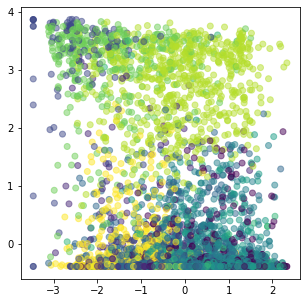

In [166]:
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 7], c=clusters,alpha=0.5)
plt.show()

In [162]:
kmeans.inertia_ 

80663.1648944342

In [163]:
%%time
kmeans = KMeans(n_clusters=4,
                init="random",
                n_init=100,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                random_state=1234)
kmeans.fit(X_prep)
print(kmeans.inertia_)

108921.62628009616
CPU times: total: 36.9 s
Wall time: 14.6 s


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

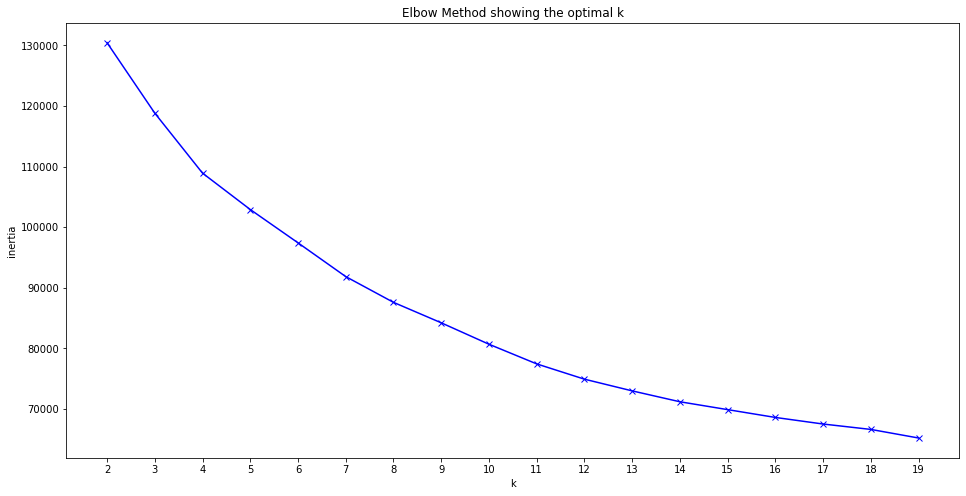

In [167]:
import numpy as np


K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

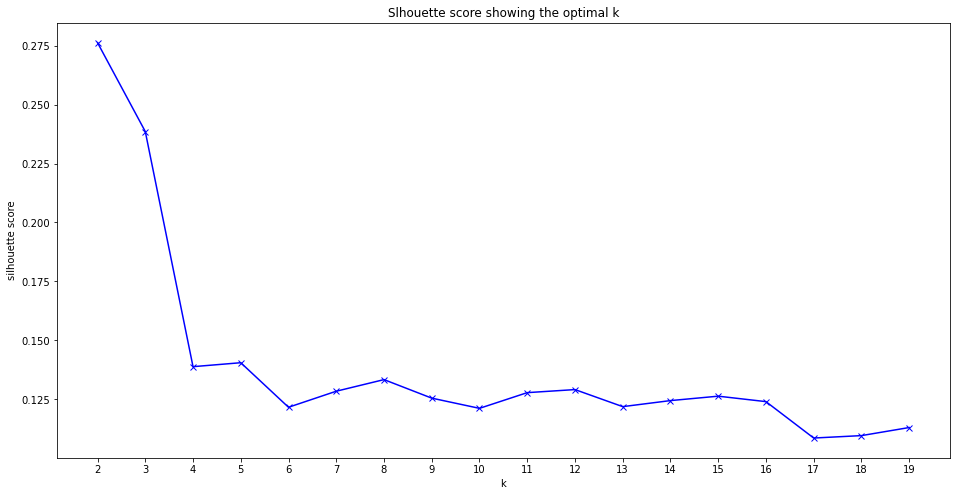

In [170]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [ ]:
data['cluster'] = kmeans.fit_predict(master_playlist)
